<a href="https://colab.research.google.com/github/setitfree/Everything/blob/main/Every_Lec2_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/setitfree/NumericalPython/main/data/combined_population_votes.csv

In [3]:
combined = pd.read_csv("combined_population_votes.csv")
combined = combined.set_index('State')  # Set index "state"
combined.head()
## OR
#combined = pd.read_csv("combined_population_votes.csv", index_col= 'State')

,Population,Votes,popmills
State,,,
Alaska,710000,3,0.710
Alabama,4780000,9,4.780
Arkansas,2916000,6,2.916
Arizona,6392000,11,6.392
California,37254000,55,37.254


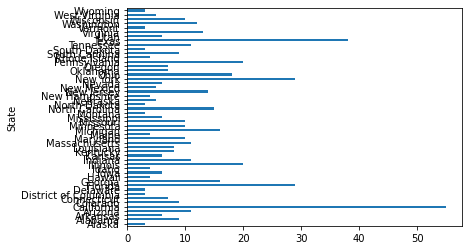

In [4]:
combined['Votes'].plot(kind = 'barh') 
# OR
#combined.Votes.plot(kind = 'barh'). Should use the above one though

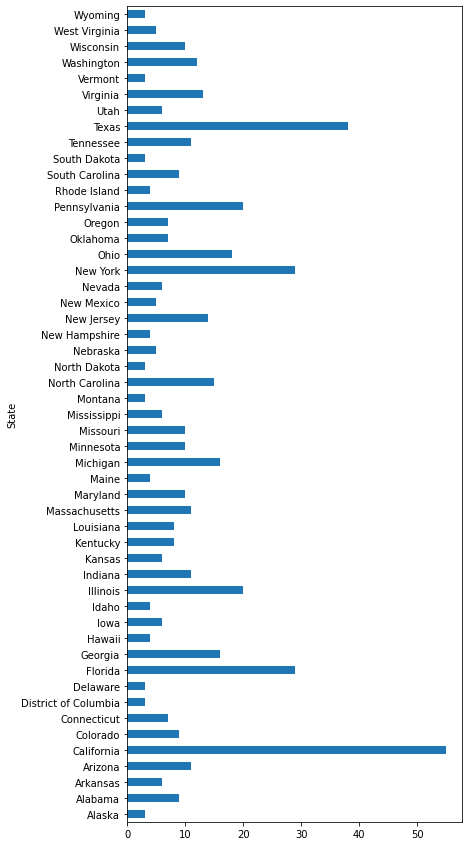

In [5]:
plt.figure(figsize=(6,15))   ## With this we expand the graph. '6' is for how wide graph should be and '15'how long
combined['Votes'].plot(kind='barh');

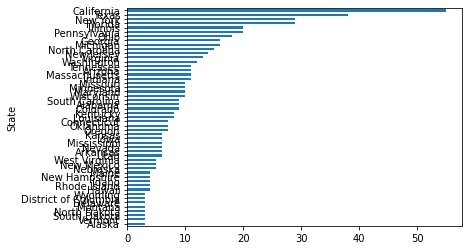

In [6]:
## Another way of doing above cell and also sorting it for better interpretation.
combined['Votes'].sort_values(ascending = True).plot(kind='barh')

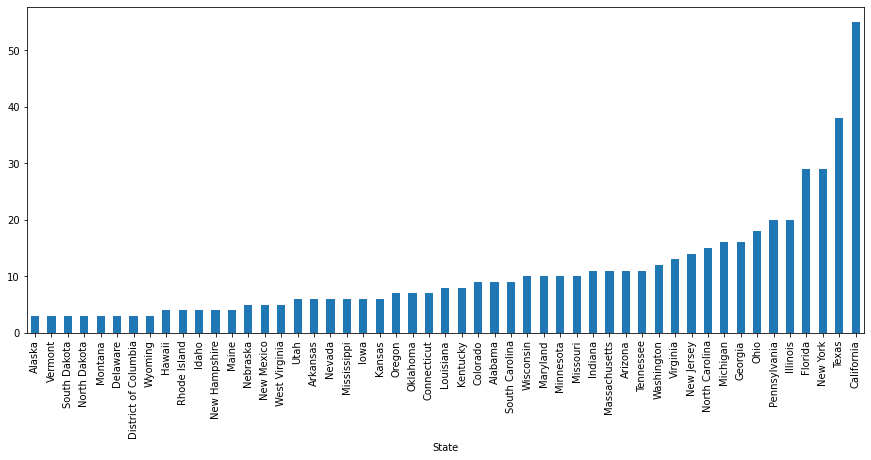

In [8]:
## Another way of sorting
fig = plt.figure(figsize=(15,6)) ## I changed size
axes = fig.gca()    ## gets the axes of graph
combined['Votes'].sort_values(ascending = True).plot(ax=axes, kind='bar');   # I removed "h" to get vertical grapg. "h" denotes horizontal

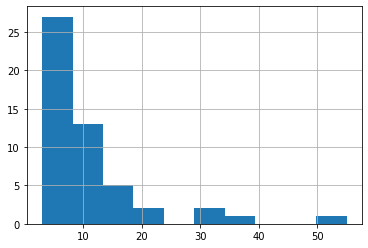

In [10]:
## To create histogram instead of bar graph
combined['Votes'].hist();
# OR 
#combined.Votes.hist()

In [ ]:
## Dosent make sence though. It just expanded it
plt.figure(figsize=(6,15))
combined['Votes'].hist()


## Coarse and fine grain

Histograms depend on the binzsize, or number of bins. Here we are looking at the number of electoral votes, so you might want to see all the individual votes in states

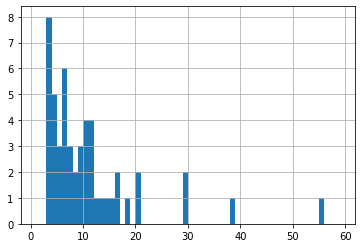

In [12]:
combined.Votes.hist(bins= np.arange(1,60,1, dtype = 'int'))   ## 1(in the beginning) denotes from where to start, 60 denotes where to end, 1(at the end) denotes bin size

But going down to this amount of bins, or fine-grain, often hides structure in the data. Perhaps a binning every 5 votes tells us more about which states have more power. Here you see that there are 18 stated with 20 votes, but 8 states with 10-15, and 5 states with 15 and 20 that have significant power


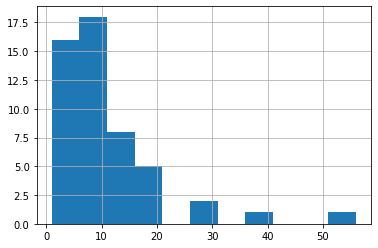

In [18]:
combined.Votes.hist(bins=np.arange(1,60,5, dtype='int'));

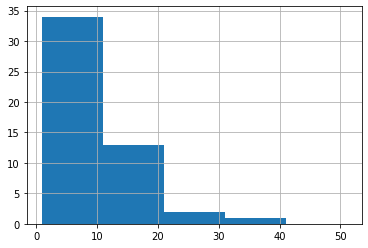

In [19]:
combined.Votes.hist(bins= np.arange(1,60,10, dtype = 'int'))    ## If binn size(10) is too much it is of no use

From all the below graphs we want to know is the number of votes increasing with the increase in population

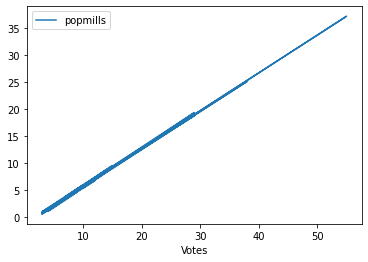

In [21]:
combined.plot(x = 'Votes', y = 'popmills')

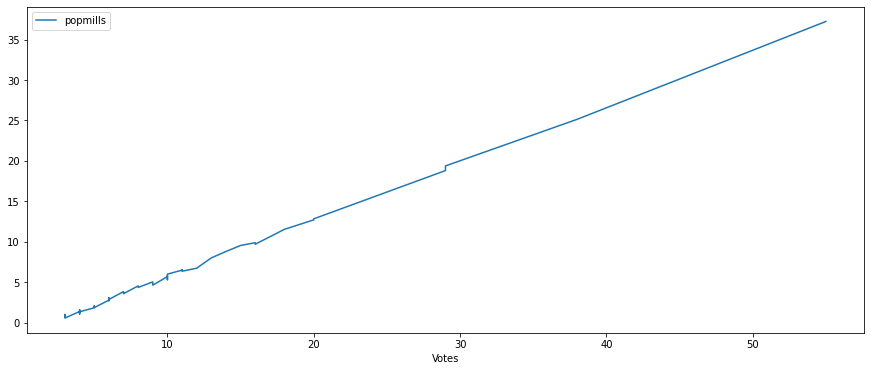

In [69]:
fig = plt.figure(figsize=(15,6))    ## Same as above
axes = fig.gca()
combined.sort_values('Votes').plot(x = 'Votes', y = 'popmills', ax=axes);

In [ ]:
sortcombined = combined.sort_values('Votes')
fig = plt.figure(figsize=(15,6))    ## Same as above
axes = fig.gca()
plt.plot(sortcombined.Votes, sortcombined.popmills)
#combined.plot(x = 'Votes', y = 'popmills', ax=axes)

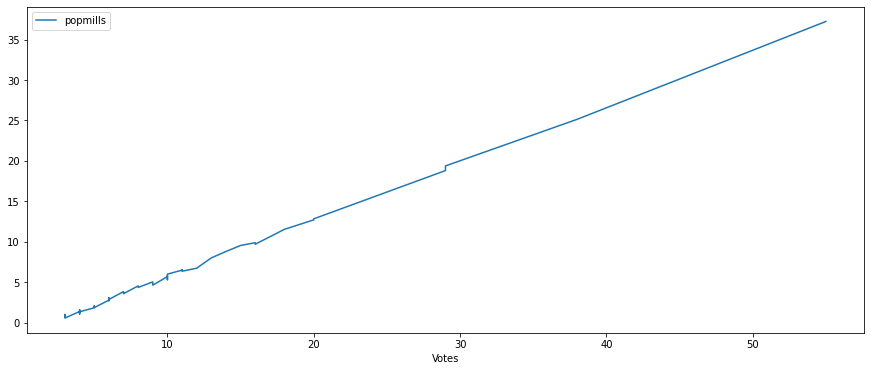

In [33]:
fig = plt.figure(figsize=(15,6))    ## When we sort the above graph
axes = fig.gca()
combined.sort_values('Votes').plot(x = 'Votes', y = 'popmills', ax = axes)

This gives you a much better idea of where the density of the points is. But suffers from issues of maybe these dots are too large, too dark, and there is no title. Since this is a matplotlib plot, you can combine matplotlib and pandas commands to fix this (its nice that pandas gives us axis labels). But we might as well see how to do this from scratch in matplotlib.

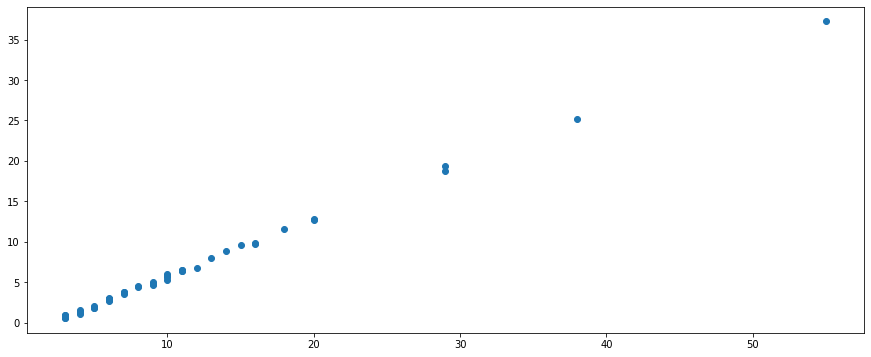

In [40]:
fig = plt.figure(figsize=(15,6)).gca()
plt.scatter(combined.Votes, combined.popmills)
# OR
#combined.plot.scatter(x = 'Votes', y = 'popmills', ax = fig)

But we have lost our labels. Lets put them and a title back. Lets also make the dots more transparent (`alpha`) so that the density is clearer

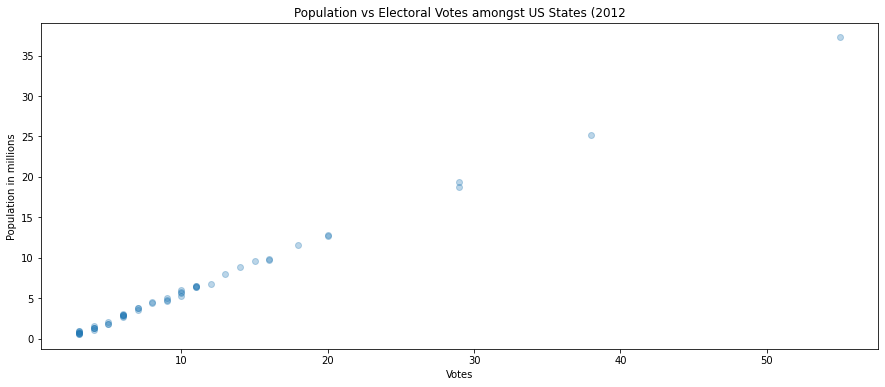

In [51]:
axes = plt.figure(figsize=(15,6)).gca()
plt.scatter(combined.Votes, combined.popmills, alpha = 0.3)
plt.xlabel('Votes')
plt.ylabel("Population in millions")
plt.title("Population vs Electoral Votes amongst US States (2012");

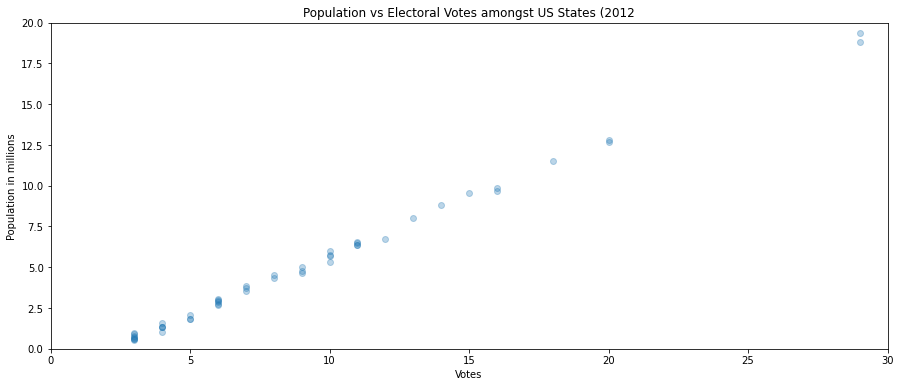

In [55]:
axes = plt.figure(figsize=(15,6)).gca()
plt.scatter(combined.Votes, combined.popmills, alpha = 0.3)
plt.xlabel('Votes')
plt.xlim(0,30)
plt.ylabel('Population in millions')
plt.ylim(0,20)
plt.title("Population vs Electoral Votes amongst US States (2012");

Now the density is much clearer. We can also change the axes limits to zoom in. The marker size can be reduced as well, (and made a square) though we might want to increase the alpha to compensate

Text(0.5, 1.0, 'Population vs Electoral Votes amongst US States (2012)')

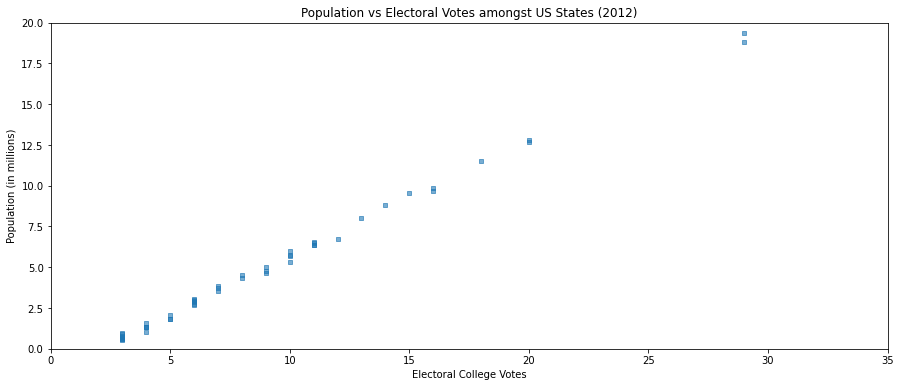

In [58]:
fig = plt.figure(figsize = (15,6))
ax = fig.gca()
plt.scatter(combined.Votes, combined.popmills, alpha=0.6, s=10, marker='s')
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)")

We can combine the plot line type and marker type as the third argument to `plot`, as seen below.


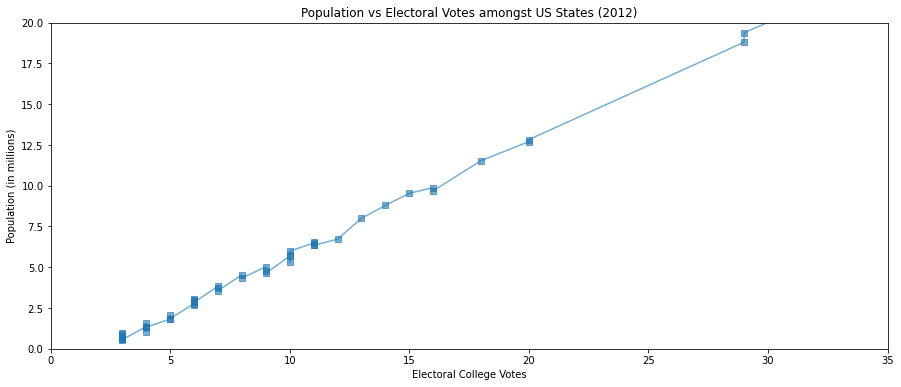

In [70]:
combined_sort = combined.sort_values('Votes')
fig = plt.figure(figsize = (15,6))
ax = fig.gca()
plt.plot(combined_sort.Votes, combined_sort.popmills,'s-', alpha = 0.6)
plt.xlabel("Electoral College Votes")
plt.xlim((0, 35))
plt.ylabel("Population (in millions)")
plt.ylim((0, 20))
plt.title("Population vs Electoral Votes amongst US States (2012)");